<a href="https://colab.research.google.com/github/SantiagoMorenoV/Position-vs-Salaries/blob/main/Python/Pos_Salaries_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Did the interviewee tell the truth?**

An HR recruiter wants to know if a candidate told the truth or not about his salary in his previous position. 

For this case, I have a dataset with the positions and salaries from the company where the candidate used to work.

This time I will estimate a Support Vector Regression.

# **Importing the libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Importing the dataset**

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/SantiagoMorenoV/Position-vs-Salaries/main/Position_Salaries.csv?token=GHSAT0AAAAAACAGCYI67EQ4C5YEIZO6TGKMZBKIN4A')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# **Plotting Data**

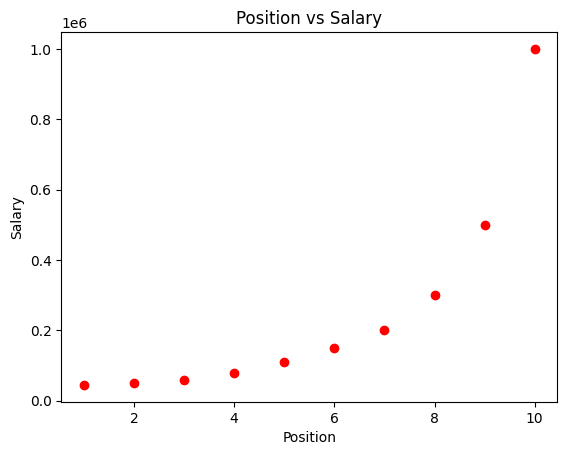

In [ ]:
plt.scatter(X, y, color='red')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Position vs Salary')
plt.show()

This time, I will estimate an SVR model.

## **Descriptive Statistics**

In [ ]:
print("\n\033[1m\033[36m\033[6m{:^50}\033[0m".format("Descriptive Statistics"))
print(dataset.describe().round(2))


              Descriptive Statistics              
       Level      Salary
count  10.00       10.00
mean    5.50   249500.00
std     3.03   299373.88
min     1.00    45000.00
25%     3.25    65000.00
50%     5.50   130000.00
75%     7.75   275000.00
max    10.00  1000000.00


# Salary distribution

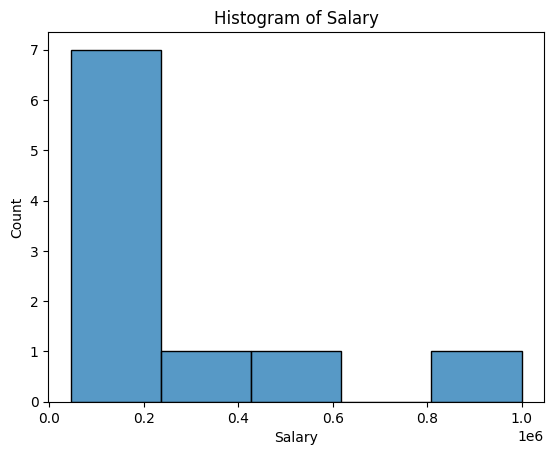

In [ ]:
# Selecting our variables
variables = ["Salary"]

# Creating histograms
for var in variables: 
  sns.histplot(data = dataset, x = var)
  plt.title("Histogram of {}".format(var))
  plt.show()

## **Salary boxplot**

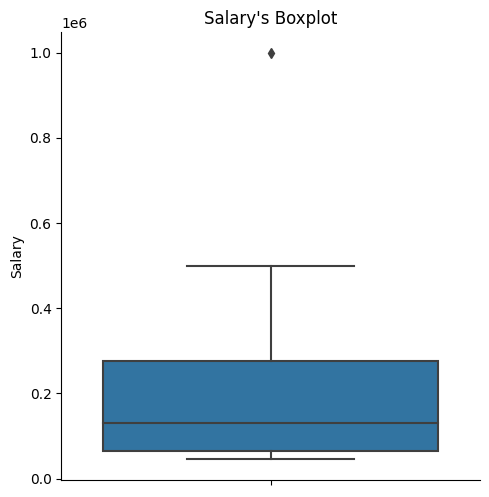

In [ ]:
for var in variables:
    sns.catplot(data = dataset, y = var, kind = "box") 
    plt.title("{}'s Boxplot".format(var)) 
    plt.show()

**Reshaping the explained variable**

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

### **Standarized data**

In [ ]:
df_X = pd.DataFrame(X, columns=['X'])
df_y = pd.DataFrame(y, columns=['y'])
table = pd.concat([df_X, df_y], axis=1)
print(table)

          X         y
0 -1.566699 -0.720043
1 -1.218544 -0.702438
2 -0.870388 -0.667228
3 -0.522233 -0.596808
4 -0.174078 -0.491178
5  0.174078 -0.350339
6  0.522233 -0.174289
7  0.870388  0.177810
8  1.218544  0.882008
9  1.566699  2.642503


# **Training the Support Vector Regression on the whole dataset**

For this exercise, I have trained the model on the whole dataset because there are only ten records.

In [ ]:
from sklearn.svm import SVR
regressor = SVR( kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

If this part is not displayed on Github, please copy the URL and paste it on https://nbviewer.org/. However, this will not affect the rest of the code or its execution.

# **Predicting the salary**

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
print(y_pred)

[[170370.0204065]]


# **Visualising the SVR results**

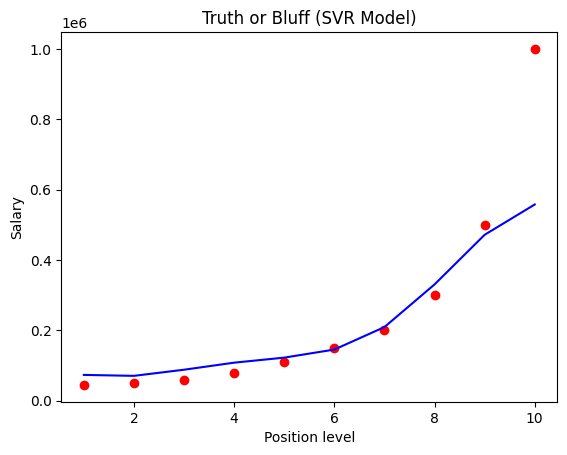

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# **Visualising the SVR results (for higher resolution and smoother curve)**

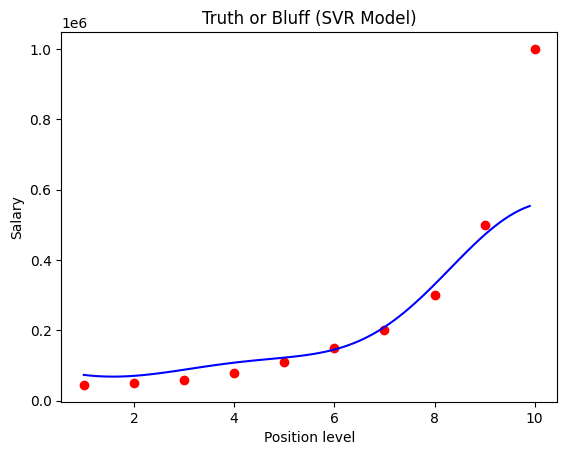

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# **Discussion**

Once evaluated that the previous position of the candidate was Regional Manager, he had been working in that role for two years, and also that, once gotten data from the previous company, it was possible to classify him as an intermediate-level in the 6-7 range or between Regional Manager and Partner. In other words, a 6.5 position level.

The SVR model predicted this candidate's salary of USD 170,370.02 close and a little more than his answer, USD 160K per year. In conclusion, the statistical evidence showed that he might be telling the truth.

There is a Polynomial regression with a closer prediction in another file of this project repository.